# 1. Objective

- a prediction of a district’s median housing price of calfornia area
- Date: 12 Sept 2024

## 1.2 Details


**Mapping ML Problem**

- main objective of the problem
- current solution if there is anything
- Frame the probelm: 
  - supervised or unsupervised or reinforcement learning
  - classification or Regression or something else
  - batch learning or online learning
- select a performance measure meteric
  
  
**In this case**
 - its supervised learning
 - regression task (univariate regression i.e. predicating only 1 target , else it would multivariate regression)
 - batch learning method



### For regression  problems , Root mean square error (RMSE) is used in measuring performance

- in case there are many outliers , consider using mean absolute error also with RMSE

- computing the root of a sum of square corresponds to the euclidean norm, also known as l2 norm
- computing the sum of absolutes MAE, corresponds to the l1 norm, also know manhatten norm

- The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred


- Represents a district or block group from the 1990 California census
- A block group is the smallest geographical unit for which the U.S. Census publishes sample data, generally containing between 600 and 3,000 people.

# 2. Download the data

In [1]:
import numpy as np
import pandas as pd

raw_df = pd.read_csv("data/california_housing.csv")

print(raw_df.shape)

raw_df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 2. Data Glance ----------

In [2]:
df = raw_df.copy()

In [3]:
print(df.info())

print('\n Ocean Proximity types \n', df['ocean_proximity'].value_counts())

'''
- every colum is float, except ocean_proximity
- all columns having non_null values, 20640, 
- except total_bedroom cols which have 207 cols having null values

- Ocean_proximity column has 5 types
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

 Ocean Proximity types 
 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


'\n- every colum is float, except ocean_proximity\n- all columns having non_null values, 20640, \n- except total_bedroom cols which have 207 cols having null values\n\n- Ocean_proximity column has 5 types\n'

In [4]:
# lets check mean,min mac values of columns
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


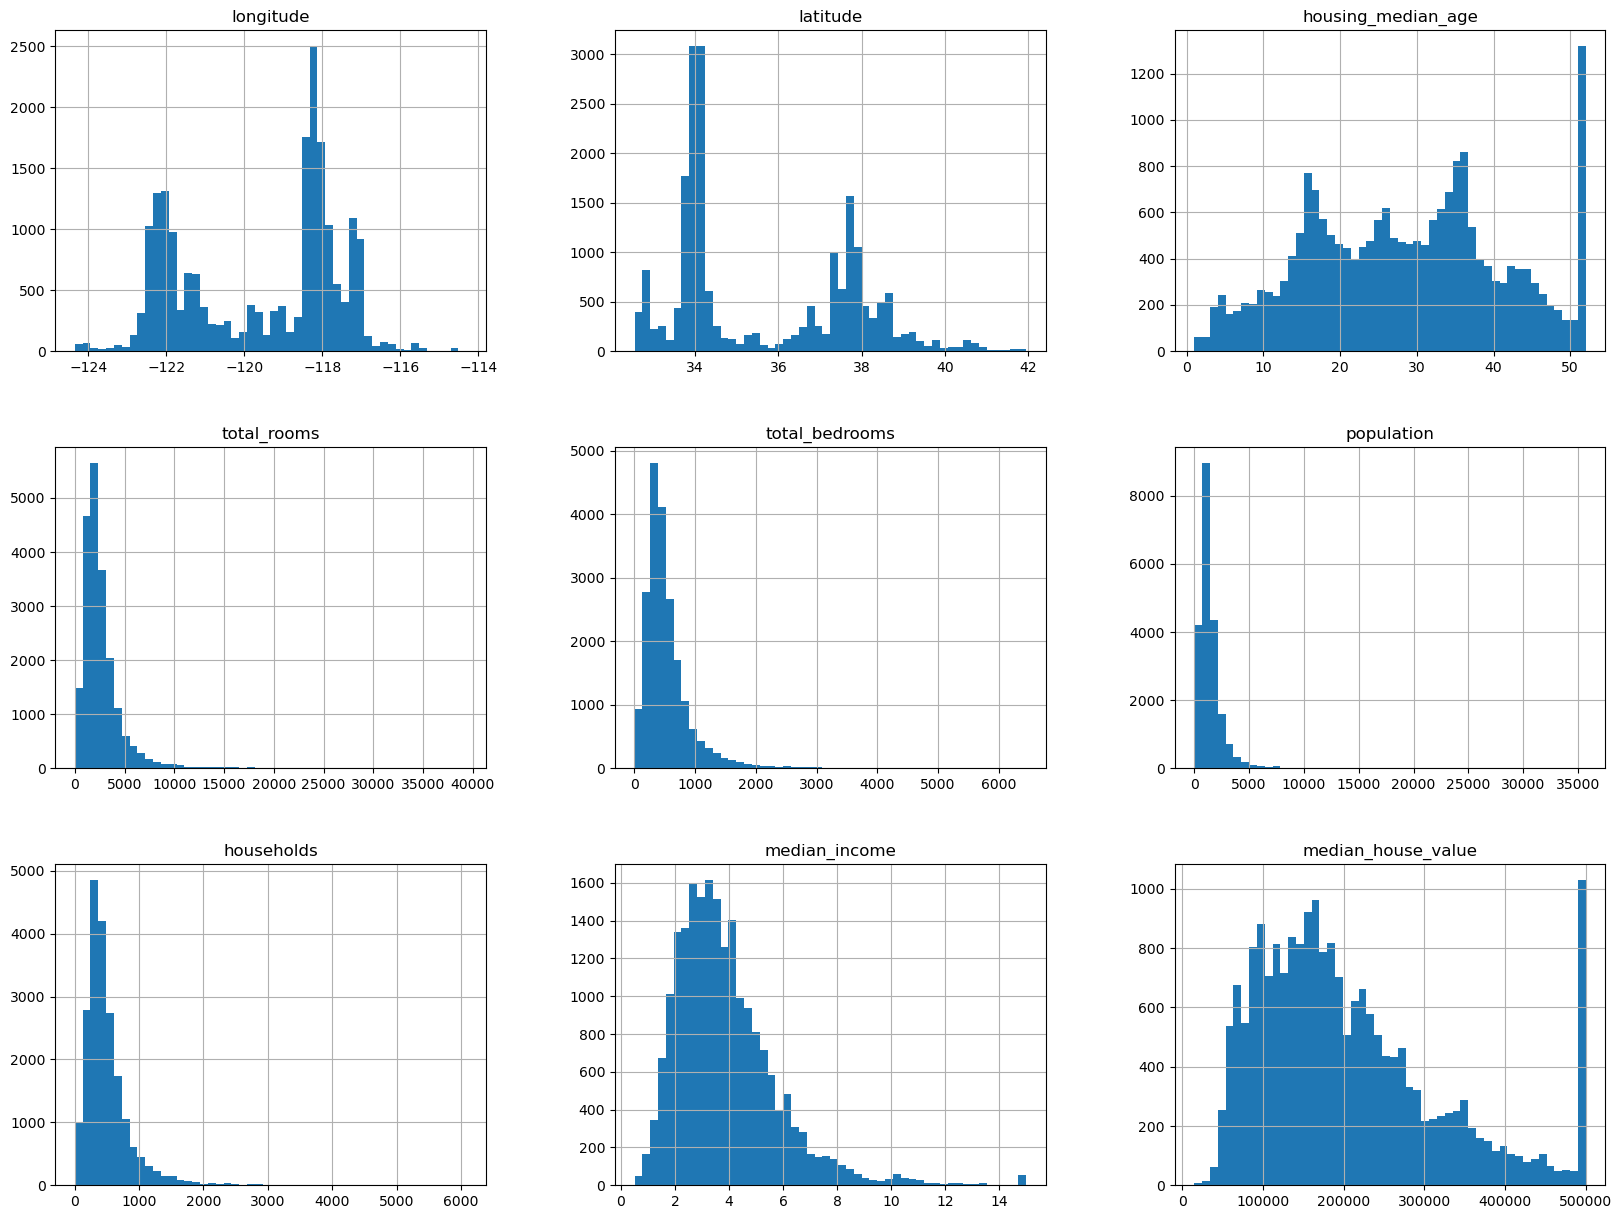

In [5]:
# lets see each variable distribution using histogram chart

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns


df.hist(bins = 50, figsize = (20,15))
plt.show()

In [6]:
# from the other source materials, we came to know that income col is sacled, ranging between 3 to 15, 15 the highest,
# income of 3 roughly means 30k dollars 

# many histograms are tail heavy , for these mean will be pulled toward right while median will be left side of mean, around where data is heavy, right to mode
# for tail heavy variable, we need to transform these attributes later to make bell shaped distributions




# 4. Creating Train and test datasets

In [7]:
# creating Input and output vars data frames

X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

# lets create bin for target variable,for stratifying, better split in test and train data

y_binned = pd.cut(y, bins = 6)


# Using sklearn package create train test data sets for the model
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y_binned, random_state = 122, test_size = .20)

In [8]:
print(y_test.describe())

count      4128.000000
mean     206827.011628
std      115512.131310
min       22500.000000
25%      121075.000000
50%      179550.000000
75%      264200.000000
max      500001.000000
Name: median_house_value, dtype: float64


In [9]:
print(y_train.describe())

count     16512.000000
mean     206863.018229
std      115369.968138
min       14999.000000
25%      119300.000000
50%      179700.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64


In [10]:
y_train.head()

16099    268900.0
10610    235600.0
16933    283300.0
9731     229900.0
15982    406500.0
Name: median_house_value, dtype: float64

# 5. Data exploration on Training data only

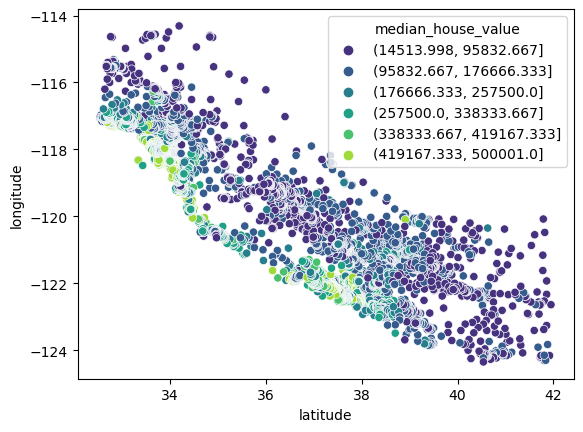

In [11]:
sns.scatterplot(data = X_train, x = 'latitude', y = 'longitude', hue = y_binned, 
               palette = 'viridis')
plt.show()

# as we can see cost of the house near the beach is high

In [12]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [13]:
## On real map ----------------- later 
# !pip install folium
# import folium
# import seaborn as sns

# # Create a Folium map centered around California
# map_california = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# # Set the deep color palette
# colors = sns.color_palette("viridis")

# # Add points to the map using the deep color palette
# for idx, row in X_train.iterrows():
#     folium.CircleMarker(
#         location=(row['latitude'], row['longitude']),
#         radius=2,  # Radius of the circle
#         color=colors[idx % len(colors)],  # Use colors from the deep palette
#         fill=True,
#         fill_color=colors[idx % len(colors)],  # Use same color for fill
#         fill_opacity=0.5,
#         popup=f'Median House Value: {y_train[idx]}',  # Display house value on click
#     ).add_to(map_california)

# # Save to HTML or display in a Jupyter notebook
# # map_california.save('california_housing_map_2.html')
# map_california  # Uncomment this line to display in a Jupyter notebook


In [14]:
#check Correaltion matrix

train_fd_df = pd.concat([X_train, y_train], axis = 1) #fd_df = full_data_data_frame

corr_matrix = train_fd_df.drop('ocean_proximity', axis = 1).corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.685655
total_rooms           0.133024
housing_median_age    0.103849
households            0.067697
total_bedrooms        0.051449
population           -0.026661
longitude            -0.044942
latitude             -0.143946
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='households', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='households', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='households', ylabel='total_rooms'>],
       

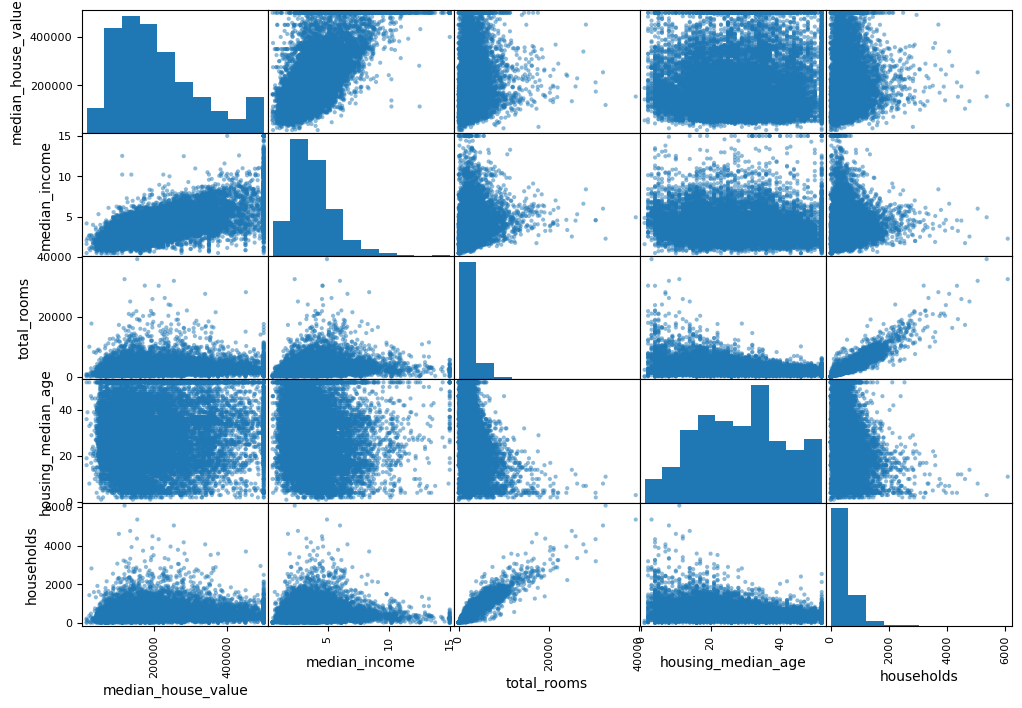

In [15]:
# secondary method to see correlation 

from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income', 'total_rooms', 'housing_median_age', 'households' ]

scatter_matrix(train_fd_df[attributes], figsize = (12,8))

In [16]:
# as we can see median_house_value shows trend with median income 

# 6. Feature Engineering

In [17]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [18]:
# some features like  total_room, total_bedroom, doesn't make sense lets create some vars in the line


train_fd_df['rooms_per_household'] = train_fd_df['total_rooms']/train_fd_df['households']
train_fd_df['bedrooms_per_room'] = train_fd_df['total_bedrooms']/train_fd_df['total_rooms']
train_fd_df['population_per_houshold'] = train_fd_df['population']/train_fd_df['households']
train_fd_df['bedrooms_per_room'] = train_fd_df['total_bedrooms']/train_fd_df['total_rooms']


corr_matrix = train_fd_df.drop('ocean_proximity', axis =1).corr()
corr_matrix['median_house_value'].sort_values(ascending = False)


median_house_value         1.000000
median_income              0.685655
rooms_per_household        0.153613
total_rooms                0.133024
housing_median_age         0.103849
households                 0.067697
total_bedrooms             0.051449
population_per_houshold   -0.021080
population                -0.026661
longitude                 -0.044942
latitude                  -0.143946
bedrooms_per_room         -0.248541
Name: median_house_value, dtype: float64

In [19]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [20]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# 7. Data Cleaning

## 7.1 Missing Numerical Vars Treatment
  - Get rid of missing row
  - Get rid of whole column/attribute
  - Set the values to some value ( it can be zero, mean, median, mode etc)

  

In [21]:
# we will sklearn's simpleimputer function to impute the value using median values
# for future purpose we should store the median value to impute in test dataset and also when model goes live

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

# since the median can only be computed for numerical cols, we have to remove categorical columns
X_train_2 = X_train.copy()

X_train_2_num = X_train_2.drop(['ocean_proximity'], axis = 1)


In [22]:
imputer.fit(X_train_2_num)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2126.    ,  435.    , 1165.    ,
        409.    ,    3.5385])

In [24]:
X_train_2_num.describe() # double check :) 50%

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16339.000000,16512.000000,16512.000000,16512.000000
mean,-119.568032,35.629716,28.619671,2626.805111,536.568945,1421.440346,498.306202,3.866493
std,2.003815,2.135335,12.568354,2148.099207,416.814732,1130.300554,377.138249,1.882338
min,-124.350000,32.540000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900
25%,-121.790000,33.930000,18.000000,1451.000000,296.000000,788.000000,280.000000,2.569000
50%,-118.490000,34.260000,29.000000,2126.000000,435.000000,1165.000000,409.000000,3.538500
75%,-118.000000,37.710000,37.000000,3141.250000,644.500000,1723.000000,603.000000,4.740250
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [25]:
X_train_2_num.median()#.values # another way finding median for each column of dataframe

longitude             -118.4900
latitude                34.2600
housing_median_age      29.0000
total_rooms           2126.0000
total_bedrooms         435.0000
population            1165.0000
households             409.0000
median_income            3.5385
dtype: float64

In [26]:
X_train_2_num_imputed = imputer.transform(X_train_2_num)

# # this can be directly done via below code, fit_transform------ 
# X_train_2_num_imputed = imputer.fit_transform(X_train_2_num)


# the output of transform is numpy array need to convert it into pandas dataframe-------
print(type(X_train_2_num_imputed))


X_train_2_num_imputed = pd.DataFrame(X, columns = X_train_2_num.columns, index = X_train_2_num.index)
print(type(X_train_2_num_imputed))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


## 7.2 Handling Categorical variables

**there are multiple ways of treatment categeroical variables**
   - ordinal encoding : good for order variables (good, better, best)
   - one hot encoding : no order data, and cardinilaty(unique count of types) is low
   - there are many other types hash coding, leave one out coding etc

Choosing the Right Encoding
 - Small number of categories (low cardinality): One-Hot Encoding or Label Encoding works well.
 - High cardinality (many categories): Consider Target Encoding, Binary Encoding, or Hashing Encoding to avoid dimensionality issues.
 - Ordinal data: Use Ordinal Encoding.

In [27]:
X_train_2_cat = X_train_2[['ocean_proximity']]
print(type(X_train_2_cat))

<class 'pandas.core.frame.DataFrame'>


In [28]:
# here we will use one hot encoder

from sklearn.preprocessing import OneHotEncoder

# initialize -----
cat_encoder = OneHotEncoder()
X_train_2_cat_1hot = cat_encoder.fit_transform(X_train_2_cat)

print(type(X_train_2_cat_1hot))

<class 'scipy.sparse._csr.csr_matrix'>


In [29]:
# to convert sparse matrix into 2d array

X_train_2_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [30]:
# to see which catefories each column represent
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [31]:
# try to learn custom transformation in deatils, in future, it will help in creating pipelines, which will be very helpful in projects



# 8. Feature Scaling

- Machine learning algos don't perform well, when the input numerical attributes have very different scales
- Scalling Techinque : most common
  - **Min Max Scaling**: Values are shifted and rescaled, range between 0 and 1
      - (x - min)/(max - min)
      - sklearn : MinMaxScaler
          - feature_range hyperparameter that lets you change the range if, for some reason, you don't want 0-1
  - **Standardization**: 
      - (x-mean)/std, so the resulting distribution has unit variance
      - Unlike min_max scaling, standarization does not bound the values in a particular range, which may be problems for some algos (eg Neural Network often expect an input value between 0 and 1)
      - But Standarization is much less affected of outliers
         - example: suppose in house_age column a value by mistake is 200, in min_max_scale 200 val will be converted to 1, while other values may lie between 0 to 0.3 
      - sklearn: provides a transformer StandardScaler
 
 - **Important** while transformation, we have to fit the scalers to the training data only, not to the full dataset (including test set)

# 9. Transformation Pipelines

- there are many data transformation steps needed to be excuted in the right order
- Scikit learn provides the **Pipeline** class to help with such sequences of transformation


## 9.1 Creating basic Pipeline, via stdscaler

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
#     ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [33]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [34]:
X_train_2_num_tr = num_pipeline.fit_transform(X_train_2_num)

In [35]:
print(type(X_train_2_num_tr))

# important: remember output of pipeline fit_transform is a numpy n dimensional array

<class 'numpy.ndarray'>


## 9.2 Creating Pipeline with two transformation

In [36]:
# till now we have separately handled the numerical and categerorical columns, lets do this combininly

from sklearn.compose import ColumnTransformer

num_attribs = list(X_train_2_num)
cat_attribs = ['ocean_proximity']

pipeline_t1 = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])


X_train_prepared = pipeline_t1.fit_transform(X_train)

In [37]:
num_attribs = list(X_train_2_num)
print(num_attribs)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [38]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

## 8.3 Pipeline: steps
  - **Missing value treatment, numerical vars via median**
  - **Categorical Vars one hot encoding**
  - **New Vars Creation**
  - **Scaling**
  
why scaling at last, because new vars if created after scaling, those value will loose its true picutre


### 8.3.1 Create custom function for adding new vars

- **BaseEstimator**: This provides basic functionality like get_params() and set_params() for hyperparameter tuning, which is useful in grid search or cross-validation.

- **TransformerMixin**: This ensures that your class implements the fit_transform() method, which is a shortcut for calling fit() followed by transform().

- **Custom fit Method**: In this case, the fit method doesn’t need to do anything because no fitting is required, but it’s still necessary to implement it to adhere to the scikit-learn API.

- **Custom transform Method**: This is where the feature engineering happens. The custom features like rooms_per_household, bedrooms_per_room, and population_per_household are added here

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin


class CustomFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # you can add params if needed here
        pass
    
    def fit(self, X, y = None):
       
        return self
    
    def transform(self, X, y = None):
        # add custom features
        X = X.copy() # avoiding changing the original data
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        X['population_per_household'] = X['population'] / X['households']
        return X

In [80]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Custom transformer class for adding new features
class CustomFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
         #nothing to fit here
        return self
    
    def transform(self, X, y=None):
        X = pd.DataFrame(X, columns=num_attribs)  # Convert back to DataFrame to use column names
        # add custom features here
        X['rooms_per_household'] = X['total_rooms'] / X['households']
        X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
        X['population_per_household'] = X['population'] / X['households']
        return X

# Define the numerical and categorical attributes
num_attribs = ['longitude', 'latitude','median_income', 'housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households']
cat_attribs = ['ocean_proximity']

# Step 1: Numerical pipeline (Imputation -> Feature creation -> Scaling)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Step 1: Impute missing values
    ('add_custom_features', CustomFeatureAdder()),  # Step 2: Add custom features
    ('scaler', StandardScaler())  # Step 3: Scale features
])

# Step 2: ColumnTransformer to apply the numerical pipeline and OneHotEncoder for categorical features
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),  # Apply to numerical attributes
    ('cat', OneHotEncoder(), cat_attribs)  # One-hot encode categorical attributes
])

# Apply the pipeline to your training data
X_train_prepared = preprocessing_pipeline.fit_transform(X_train)

# Define the column names manually (original num_attribs + new features + one-hot encoded columns)
columns = num_attribs + ['rooms_per_household', 'bedrooms_per_room', 'population_per_household'] + \
          list(preprocessing_pipeline.transformers_[1][1].get_feature_names_out(cat_attribs))

# Convert the result back to DataFrame
X_train_prepared = pd.DataFrame(X_train_prepared, columns=columns)



In [44]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16099,-122.51,37.76,43.0,2345.0,624.0,1439.0,614.0,2.8448,NEAR OCEAN
10610,-117.78,33.68,11.0,1994.0,477.0,849.0,411.0,4.0187,<1H OCEAN
16933,-122.33,37.57,20.0,2126.0,643.0,1112.0,597.0,3.6250,NEAR OCEAN
9731,-121.72,36.81,18.0,1984.0,379.0,1078.0,359.0,3.2969,<1H OCEAN
15982,-122.47,37.76,52.0,2941.0,783.0,1545.0,726.0,2.9899,NEAR BAY


In [45]:
X_train_prepared.head()

,longitude,latitude,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.468228,0.997665,-0.542795,1.144204,-0.131192,0.213374,0.015536,0.306777,-0.674862,0.836578,-0.067629,0.0,0.0,0.0,0.0,1.0
1,0.892341,-0.913100,0.080863,-1.401950,-0.294597,-0.141063,-0.506465,-0.231504,-0.240705,0.407412,-0.093780,1.0,0.0,0.0,0.0,0.0
2,-1.378396,0.908683,-0.128298,-0.685844,-0.233146,0.259186,-0.273776,0.261699,-0.783396,1.416899,-0.112884,0.0,0.0,0.0,0.0,1.0
3,-1.073968,0.552756,-0.302608,-0.844979,-0.299253,-0.377355,-0.303858,-0.369388,0.043113,-0.361969,-0.005613,1.0,0.0,0.0,0.0,0.0
4,-1.448265,0.997665,-0.465708,1.860310,0.146271,0.596745,0.109319,0.603759,-0.577402,0.838780,-0.087909,0.0,0.0,0.0,1.0,0.0


In [46]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16099,-122.51,37.76,43.0,2345.0,624.0,1439.0,614.0,2.8448,NEAR OCEAN
10610,-117.78,33.68,11.0,1994.0,477.0,849.0,411.0,4.0187,<1H OCEAN
16933,-122.33,37.57,20.0,2126.0,643.0,1112.0,597.0,3.6250,NEAR OCEAN
9731,-121.72,36.81,18.0,1984.0,379.0,1078.0,359.0,3.2969,<1H OCEAN
15982,-122.47,37.76,52.0,2941.0,783.0,1545.0,726.0,2.9899,NEAR BAY


## 8.3 Learning a bit about pipeline attributes

In [47]:
# Regarding 
# ist(preprocessing_pipeline.transformers_[1][1].get_feature_names_out(cat_attribs)) # categorical cols name list

# preprocessing_pipeline = ColumnTransformer([
#     ('num', num_pipeline, num_attribs),  # Apply num_pipeline to numerical features
#     ('cat', OneHotEncoder(), cat_attribs)  # Apply OneHotEncoder to categorical features
# ])
print(list(preprocessing_pipeline.transformers_))

[('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('add_custom_features', CustomFeatureAdder()),
                ('scaler', StandardScaler())]), ['longitude', 'latitude', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']), ('cat', OneHotEncoder(), ['ocean_proximity'])]


In [48]:
print("\n First Transformer---- \n ", list(preprocessing_pipeline.transformers_[0]))

print("\n second Transformer---- \n ", list(preprocessing_pipeline.transformers_[1]))
print("\n cat cols name---- \n ", list(preprocessing_pipeline.transformers_[1][1].get_feature_names_out(cat_attribs)))


# preprocessing_pipeline.transformers_: This is an attribute of the ColumnTransformer that stores the transformations applied


 First Transformer---- 
  ['num', Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('add_custom_features', CustomFeatureAdder()),
                ('scaler', StandardScaler())]), ['longitude', 'latitude', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']]

 second Transformer---- 
  ['cat', OneHotEncoder(), ['ocean_proximity']]

 cat cols name---- 
  ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


# 10 Train Model

## 10.1 Linear Regression

In [49]:
# lets start training the model with regression 

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [50]:
# lets plot the predication 
y_train_pred = lin_reg.predict(X_train_prepared)



print(type(y_train_pred))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [51]:
# Reset index to avoid NaN issues when creating the DataFrame
y_train_amigo = y_train.copy() 
y_train_amigo = y_train_amigo.reset_index(drop=True)
y_train_pred_series = pd.Series(y_train_pred).reset_index(drop=True)

In [52]:
y_train_pred_df = pd.DataFrame({'y_train_actual_value' : y_train_amigo,
                               'y_train_pred_value' : y_train_pred_series})

y_train_pred_df.tail()

,y_train_actual_value,y_train_pred_value
16507,71300.0,136448.0
16508,153100.0,171200.0
16509,156300.0,259008.0
16510,149500.0,214976.0
16511,104600.0,90880.0


<Axes: xlabel='y_train_actual_value', ylabel='y_train_pred_value'>

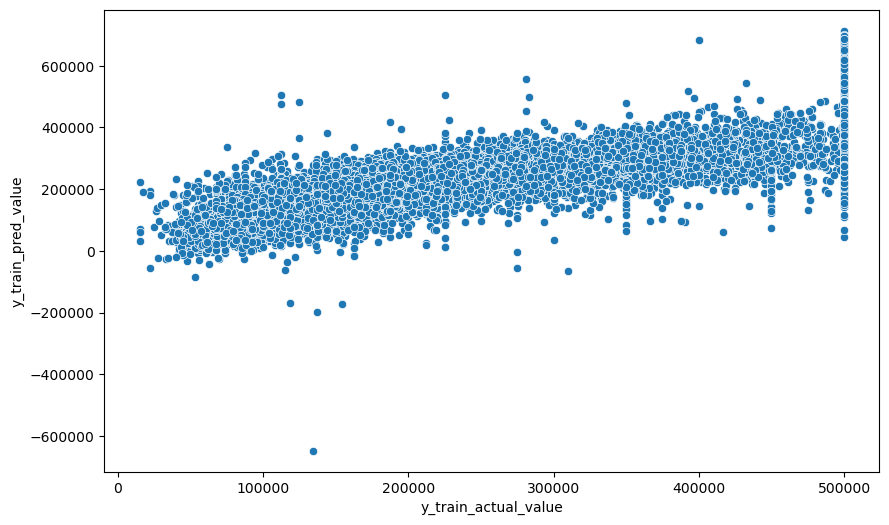

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='y_train_actual_value', y='y_train_pred_value', data=y_train_pred_df)


In [54]:
y_train_pred_df.describe()

,y_train_actual_value,y_train_pred_value
count,16512.000000,16512.000000
mean,206863.018229,206841.480620
std,115369.968138,93134.832214
min,14999.000000,-647360.000000
25%,119300.000000,143360.000000
50%,179700.000000,203456.000000
75%,265000.000000,261376.000000
max,500001.000000,714048.000000


In [ ]:
# interesting price of the home go negative , which unrealstick

In [55]:
# lets measure the RMSE score for the model 
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_train, y_train_pred)

lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68297.90823883412


### Model results pointers

- house price value lies b/w 120k to 265k (25% to 75%).
- error of 68k  up and down is to big

- its total case of underfitting , to cope this we can do
  - more powerful model,
  - feed better featurs for training model
  - to reduce constraint on the model
  
  



# 10.2 Decison Tree 

In [56]:
# lets use a decison tree a powerfull model

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prepared, y_train)

y_train_predict_tree_reg = tree_reg.predict(X_train_prepared)

In [57]:
# check rmse score
tree_mse = mean_squared_error(y_train, y_train_predict_tree_reg)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


# no error, absolutely perfect, overfit case
# we can further divide the train data, train and validation set and check results 

0.0

In [62]:
# scikit learn has k-fold cross validation feature

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_prepared, y_train,
                        scoring = 'neg_mean_squared_error', cv = 10)

tree_rmse_scores = np.sqrt(-scores) # sklearn cv feature expect utility function(greater is better) ratehe cost_function (lower is better)


# create function to see scores in details 

def display_scores(scores):
    print('Scores:', scores)
    print('Mean_Scores:', scores.mean())
    print('Standard Deviation:', scores.std())

display_scores(tree_rmse_scores)

Scores: [76031.57352492 73516.40253095 71134.95295192 67473.23701518
 72005.27280342 65831.42359973 73064.19076355 71875.3470659
 72469.09945578 70083.5053155 ]
Mean_Scores: 71348.50050268348
Standard Deviation: 2804.297495052483


- now decision tree does not look good
- Lets compute Cross validaton for Linear Regression also and compare the result

In [59]:
lin_cv_scores = cross_val_score(lin_reg, X_train_prepared, y_train, 
                               scoring = 'neg_mean_squared_error', cv = 10)

lin_cv_rmse_scores = np.sqrt(-lin_cv_scores)


display_scores(lin_cv_rmse_scores)

Scores: [67184.66779465 72823.83299703 66681.19240699 67941.33575521
 67333.06330736 64340.18878658 68413.75188435 67546.44219722
 70471.72536392 73437.37307125]
Mean_Scores: 68617.3573564555
Standard Deviation: 2678.7292781539045


In [60]:
y_train.describe()

count     16512.000000
mean     206863.018229
std      115369.968138
min       14999.000000
25%      119300.000000
50%      179700.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64

- we will see with another model **Random Forest**


- Linear regression cv_rmse scores mean (68617) is slightly better than decison trees score (71348), 
- regression model is fair, but their room for improvement

- ideal sceanrio
   - Low Mean RMSE: better accuracy
   - Low Standard deviation Score: consistent and stable performance

**Assessment**
   - Proportional to the mean: RMSE is around 33% of the mean house price (68617 / 206,863), which is quite significant.
   - Proportional to the price range: house prices range from around 120k to 500k, so an error of 68k is still large in this context, as it represents a large portion of the total price range.
   
   
- RMSE should be a smaller percentage of the average house price, suggesting more accurate predictions.
   - **RMSE as a percentage of the mean**:  
       - rmse: 68617
       - mean house price: 206863
       - rmse as percentage of mean (68617/206863)*100 = 33%
       - the model's predictions are, on average, off by 33% of the mean house price. If the true price of a house is 206,863, the model could predict a price anywhere between roughly 138k to 275k  (due to the ± RMSE of 68k)
       
   - **Ideal Scenario**
      - suppose rmse scores goes down to 20000
      - rmse as percentage of mean (20000/206863)*100 = 9.7%
      - This means model’s predictions are, on average, off by 9.7% of the mean house price, a much smaller margin of error compared to the previous 42%.
      - **implication**: If the true price of a house is 206k, the model’s prediction would now be between 186k and 226k (± 20,000). This range is much tighter, giving more confidence in the model’s predictions



## 10.3 Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

# initialize it, with default hyperparameters
forest_reg = RandomForestRegressor()

forest_reg.fit(X_train_prepared, y_train)

y_train_predict_forest_reg = forest_reg.predict(X_train_prepared)



In [67]:
# check rmse score
forest_mse = mean_squared_error(y_train, y_train_predict_forest_reg)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


18623.533440275245

In [68]:
forest_cv_scores = cross_val_score(forest_reg, X_train_prepared, y_train,
                                   scoring = 'neg_mean_squared_error', cv = 10)
forest_cv_rmse_scores = np.sqrt(-forest_cv_scores)
display_scores(forest_cv_rmse_scores)

Scores: [52367.47092141 51894.05317059 49226.28121685 49684.06840172
 50080.38920637 45555.88094221 49705.15873599 50897.28296259
 49450.24200503 51501.71345064]
Mean_Scores: 50036.254101341474
Standard Deviation: 1818.893833059252


- **Random Forest** results are much better, and look very promising
- RMSE score of the training dataset is still much lower than the validation sets, implying that the model is still overfitting the training data set,
- possible solution for overfitting are 
    - to simplify the mode, constrain it(i.e. regualaize it) or
    - get a lot a more training data
    
  


# 11 Fine Tune Your Model

   - **Grid Search**
   - **Randomized Search**
   - **Ensembled Methods**


## 11.1 Grid Search

 - What is Grid Search:  works through multiple combination of hyperparameters, creating grid of possible values and evaluating performance for each combination   
 - Purpose: to find out the best hyperparameter for a given model based on performance metric (i.e. RMSE, accuracy, f1 score etc) using cross validation
 - **Steps**
    - Define the parameter grid
    - Create the Grid Search object
    - Fit Grid Search
    - Evaluate: Best parameters and score
    
- When have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search)
 

In [69]:
from sklearn.model_selection import GridSearchCV


# define Param grid
param_grid = [
    # grid 1
    {
        'n_estimators': [ 3,10, 30],
        'max_features': [2,4,6,8]
    },
    
    # gird 2
    {
        'bootstrap': [False],  
        'n_estimators': [3,10],
        'max_features': [2,3,4,5]
    }
    
]


# initiate the model
forest_reg = RandomForestRegressor()


# create grid search object
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

# fit the grid search

grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_features': 6, 'n_estimators': 30}
Best score: -2475952594.7533603


In [73]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [75]:
cross_validation_scores = grid_search.cv_results_

# cross_validation_scores

In [76]:
for mean_score, params in zip(cross_validation_scores['mean_test_score'],
                              cross_validation_scores['params']):
    print(np.sqrt(-mean_score), params)

63523.88798979226 {'max_features': 2, 'n_estimators': 3}
55610.830016282445 {'max_features': 2, 'n_estimators': 10}
52753.01286380072 {'max_features': 2, 'n_estimators': 30}
61468.28619690792 {'max_features': 4, 'n_estimators': 3}
52925.86222228535 {'max_features': 4, 'n_estimators': 10}
50206.07844525682 {'max_features': 4, 'n_estimators': 30}
58722.6508608892 {'max_features': 6, 'n_estimators': 3}
52022.9487327007 {'max_features': 6, 'n_estimators': 10}
49758.944871785214 {'max_features': 6, 'n_estimators': 30}
59177.47088140813 {'max_features': 8, 'n_estimators': 3}
51803.18944712339 {'max_features': 8, 'n_estimators': 10}
49898.623110310036 {'max_features': 8, 'n_estimators': 30}
60904.843451365974 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54393.07766593153 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59585.7463671776 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52611.286021926055 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

from above results, best solution 
  **max Feature: 8**
  **n_estimator: 30**
- RMSE score via grid_search : 49758, while RMSE cv score :50036.84

#### Not Here

- hypertuning in general give us better results. but if opposite, this may be happening because of 

  - **Overfitting or Suboptimal Hyperparameters:** 
       - hyperparameter search space (the grid of values) may not have been optimal.
  - **Cross-Validation Differences**
       - The performance difference could also be due to slight variations in the cross-validation process. Depending on how the data was split during cross-validation, it can sometimes result in different scores
  - **Tuning Might Not Always Help**
       - Sometimes, the default settings of Random Forest (especially in scikit-learn) can be quite robust, and hyperparameter tuning may not always significantly improve performance
       

## 11.2 Randomize Search

 - grid search is fine when we are exploring relatively few combinations
 - but when the hyperparameter serach space is large, it is often preferrable to use Randomize search
 - **Randomized Search selects a random subset of combinations from the hyperparameter space and evaluates them. Instead of testing every possible combination, , it randomly samples a fixed number of combinations.**
 
 
 **How it works**:

  - We define a parameter grid, similar to Grid Search, but instead of trying all combinations, Randomized Search samples a subset of parameter combinations.
  - specify how many combinations (iterations) to try.
  - Each combination is sampled randomly from the parameter grid.
  
**Pros**:
  - Less Computationally Expensive: By randomly sampling a subset of hyperparameters, Randomized Search is more efficient than Grid Search, especially with large hyperparameter spaces.
  - Flexibility: You can control how many parameter combinations to try by setting n_iter, making it more scalable for large models or datasets.


**Cons**:
  - Non-Exhaustive: Unlike Grid Search, Randomized Search doesn’t guarantee that the best combination will be found since it explores only a random subset of all possible combinations.
  
  
For large models or when we're tuning many hyperparameters, Randomized Search is often preferred due to its flexibility and efficiency. However, if you need to be thorough and have enough time and resources, Grid Search can give more reliable results.

## 11.3 Ensemble Methods



- Ensemble methods are a powerful technique in machine learning that combine multiple models to create a stronger overall model, improving performance, accuracy, and generalization. The idea behind ensemble learning is that by combining the predictions of multiple models, you can reduce overfitting, decrease bias and variance, and ultimately create a more robust model than any single individual model could provide.

- Just like in the example of Random Forests (an ensemble of decision trees), ensemble methods leverage the strengths of different models while compensating for their weaknesses

- Ensemble learning methods allow you to combine the predictions of several base models to produce a stronger, more robust final model. Whether through **bagging, boosting, stacking, or voting**, ensembles can reduce errors, improve generalization, and deliver better performance than any individual model could achieve alone.

# 12. Analyze the best Models and their errors

In [77]:
# we will good insigts on the problem by inspecting best model

feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances

array([7.74709339e-02, 6.61840946e-02, 3.64947831e-01, 4.41413709e-02,
       1.74075829e-02, 1.68997800e-02, 1.79135594e-02, 1.51306334e-02,
       6.10140195e-02, 5.01600518e-02, 1.07542647e-01, 1.16993640e-02,
       1.39747588e-01, 1.51386581e-04, 3.42984585e-03, 6.15931163e-03])

In [78]:
feature_names = X_train_prepared.columns  # Or if you used preprocessed data: X_train_prepared.columns

# Combine feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance, descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)


# we can drop of some of the featuere based on result

                       Feature  Importance
2                median_income    0.364948
12      ocean_proximity_INLAND    0.139748
10    population_per_household    0.107543
0                    longitude    0.077471
1                     latitude    0.066184
8          rooms_per_household    0.061014
9            bedrooms_per_room    0.050160
3           housing_median_age    0.044141
6                   population    0.017914
4                  total_rooms    0.017408
5               total_bedrooms    0.016900
7                   households    0.015131
11   ocean_proximity_<1H OCEAN    0.011699
15  ocean_proximity_NEAR OCEAN    0.006159
14    ocean_proximity_NEAR BAY    0.003430
13      ocean_proximity_ISLAND    0.000151


# 13. Evaluating Model/system on the test set

In [81]:
final_model = grid_search.best_estimator_


X_test_prepared = preprocessing_pipeline.transform(X_test)

# Define the column names manually (original num_attribs + new features + one-hot encoded columns)
columns = num_attribs + ['rooms_per_household', 'bedrooms_per_room', 'population_per_household'] + \
          list(preprocessing_pipeline.transformers_[1][1].get_feature_names_out(cat_attribs))

# Convert the result back to DataFrame
X_train_prepared = pd.DataFrame(X_train_prepared, columns=columns)

In [90]:
y_test_pred_final = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, y_test_pred_final)
final_rmse= np.sqrt(final_mse)
print(final_rmse)

48577.90124375861


/Users/saajanrajak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## 13.1 Confidence on test data----

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? You might want to have an idea of how precise this estimate is. For this, you can compute a 95% confidence interval for the
generalization error using : scipy stats t.interval

In [85]:
from scipy import stats

confidence = 0.95

squared_errors = (y_test_pred_final - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)
                        
                        ))

array([46330.14670698, 50726.15188053])

## 13.2 Implication

Interpreting the Confidence Interval:

Implications: 
   - This interval indicates that when our model predicts a house price, the average error (how far off the prediction might be from the actual price) is likely to be between 46,330 and 50,726.
   - If our model predicts a house price of 206,863, we might expect that the actual price could vary from approximately 156,133 (i.e., 206,863 - 50,726) to 253,193 (i.e., 206,863 + 46,330).

Calculating the Range:
- **Lower Bound**: To find the lower bound of the expected actual price, you subtract the higher RMSE value from the predicted price:

    - Lower Bound = Predicted Price − Upper RMSE
    - Lower Bound = 206863 − 50726 ≈ **156137**

- **Upper Bound**: To find the upper bound of the expected actual price, you add the lower RMSE value to the predicted price:
    - Upper Bound = Predicted Price − Upper RMSE
    - Upper Bound=206863 + 46330 ≈ **253193**

# 14.  Saving the Model

In [89]:
import joblib


# loading the model
joblib.dump(final_model, "calfornia_home_pred_model_v1.pkl")


# later, when you want to load the model
my_model_loaded = joblib.load('calfornia_home_pred_model_v1.pkl')

# 15. Pointers on launching, monitoring, and maintaining a machine learning system:

**Launching the Model**
  - Code Polishing: Ensure that your code is clean, well-documented, and efficient before deployment.
  - Documentation: Write comprehensive documentation for your model, including usage instructions and information about the model's architecture and performance.
  - Testing: Implement tests to validate the model’s functionality and performance before deploying it to production.

**Deployment Strategies** 
  - Saving the Model: Use libraries like Scikit-Learn to save your trained model along with the preprocessing and prediction pipeline.
  - Web Application Integration: Deploy the model within a web application where users can input data and receive predictions (e.g., through an "Estimate Price" button).
  - REST API: Consider wrapping the model in a dedicated web service that can be queried via a REST API. This allows for easier upgrades and better load balancing.

**Cloud Deployment**
  - Cloud Platforms: Utilize cloud services (e.g., Google Cloud AI Platform) to deploy your model, which simplifies scaling and load balancing.
  - JSON Requests: Ensure your model can accept JSON requests for input data and return JSON responses for predictions.

**Monitoring the Model**
  - Performance Monitoring: Implement monitoring code to regularly check the model's performance and trigger alerts if performance drops.
  - Detecting Model Decay: Be aware that models can degrade over time (a phenomenon known as "model rot") as data patterns change.
  - Downstream Metrics: Monitor relevant metrics related to your model’s performance (e.g., sales figures in a recommendation system) to identify potential issues.

**Handling Performance Drops**
  - Human Evaluation: If automated monitoring is not sufficient, consider using human raters to evaluate model predictions and provide feedback.
  - Defining Response Processes: Establish clear procedures for addressing performance drops, including retraining the model with fresh data.

**Automation**
  - Automate Data Collection: Set up scripts to regularly collect and label fresh data for retraining.
  - Automated Training: Implement scripts to automate the training and hyperparameter tuning processes for your model.
  - Model Evaluation Scripts: Write scripts to evaluate new models against previous versions before deploying them.

**Input Data Quality**
  - Input Monitoring: Monitor the quality of input data to catch potential issues early (e.g., missing features or significant shifts in data distribution).
  - Statistical Alerts: Trigger alerts based on statistical metrics (mean, standard deviation) of input features to catch anomalies.

**Backup and Rollback Strategies**
  - Model Backups: Keep backups of all versions of your models to quickly roll back in case of failures.
  - Dataset Versioning: Maintain backups of datasets to enable comparison with previous models and to roll back if necessary.

**Evaluation of Specific Data Subsets**
- Subset Testing: Create various test set subsets to evaluate model performance on specific types of inputs or recent data, providing insights into strengths and weaknesses.

**Conclusion**
Infrastructure Development: Acknowledge that building and deploying machine learning systems involves significant infrastructure and effort upfront, but streamlines future projects once established.